In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("malls.csv")

In [3]:
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [4]:
from sklearn.cluster import KMeans

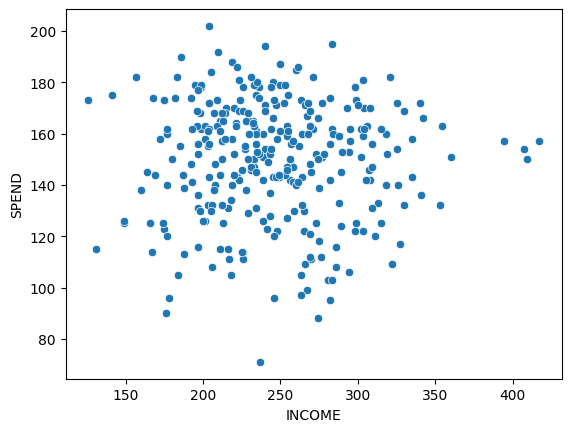

In [5]:
sns.scatterplot(data=df,x=df["INCOME"],y=df["SPEND"])
plt.show()

In [6]:
#first take random  numbers of clusters
km=KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [7]:
km.inertia_

297101.37642019434

In [8]:
centroids=km.cluster_centers_

In [9]:
centroids #centroids have 2 points  x and y ,no of centroids depends on number of clusters.

array([[196.68224299, 150.57943925],
       [317.55      , 148.73333333],
       [251.61764706, 149.31617647]])

In [10]:
centroidsdf=pd.DataFrame(centroids,columns=["x","y"])


In [11]:
centroidsdf

,x,y
0,196.682243,150.579439
1,317.550000,148.733333
2,251.617647,149.316176


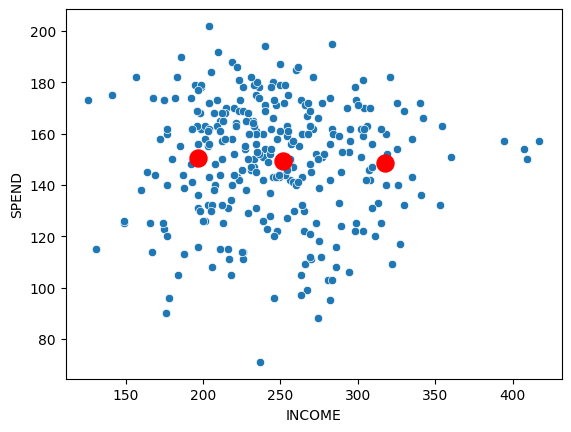

In [12]:
sns.scatterplot(data=df,x=df["INCOME"],y=df["SPEND"])
plt.scatter(centroidsdf["x"],centroidsdf["y"],c="red",s=150)
plt.show()

In [13]:
#select no of  clusters with elbow method
wcss=[]
clusters=list(range(1,21))
for i in clusters:
     model=KMeans(n_clusters=i)
     model.fit(df)
     wcss.append(model.inertia_)  #inertia from centroids maximum point of distance

In [14]:
wcss

[868805.4785478549,
 416914.67764462065,
 297183.8691692641,
 263798.27976190473,
 197554.6213073509,
 166803.2954112267,
 137875.61926689054,
 116736.46094100337,
 108920.19274835373,
 90330.80140913423,
 82609.16916285618,
 75281.52462238028,
 69055.11507579107,
 64876.046429571536,
 61880.52529338097,
 59694.28288140281,
 54112.49605886713,
 47220.56698755435,
 47959.824676660355,
 44464.4176552614]

In [15]:
clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

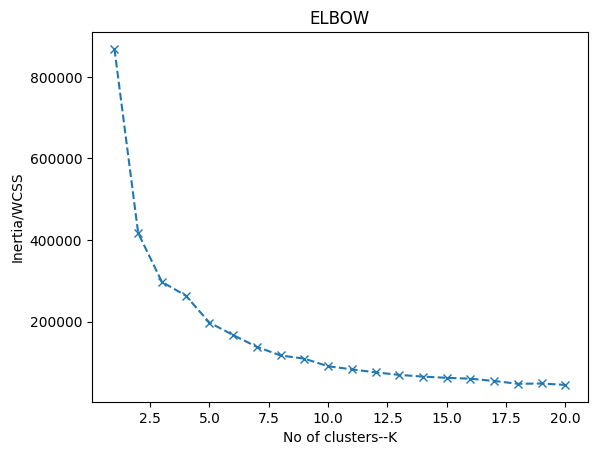

In [16]:
#elbow marking
plt.plot(clusters,wcss,"x--")
plt.xlabel("No of clusters--K")
plt.ylabel("Inertia/WCSS")
plt.title("ELBOW")
plt.show() #wcss--- within clusters sum of squares

In [17]:
#final mode
fm=KMeans(n_clusters=5)
fm.fit(df)

KMeans(n_clusters=5)

In [18]:
fm.inertia_

200176.90508033056

In [19]:
fm.cluster_centers_

array([[241.51456311, 158.00970874],
       [344.29166667, 151.16666667],
       [197.19565217, 122.97826087],
       [194.50909091, 167.30909091],
       [285.46666667, 141.08      ]])

In [20]:
cen2=fm.cluster_centers_

In [22]:
cen2

array([[241.51456311, 158.00970874],
       [344.29166667, 151.16666667],
       [197.19565217, 122.97826087],
       [194.50909091, 167.30909091],
       [285.46666667, 141.08      ]])

In [23]:
cen2df=pd.DataFrame(cen2,columns=["x","y"])

In [24]:
cen2df

,x,y
0,241.514563,158.009709
1,344.291667,151.166667
2,197.195652,122.978261
3,194.509091,167.309091
4,285.466667,141.080000


In [25]:
fm.labels_

array([0, 0, 3, 0, 1, 3, 4, 0, 3, 3, 0, 4, 0, 2, 4, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 3, 4, 3, 2, 1, 3, 3, 2, 3, 4, 2, 3, 4, 0, 4, 1, 4, 0, 3, 4,
       1, 1, 0, 0, 2, 0, 0, 4, 0, 3, 0, 3, 3, 0, 3, 4, 4, 4, 3, 2, 3, 3,
       0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 4, 1, 4, 4, 0, 4, 3,
       3, 0, 0, 3, 0, 4, 2, 2, 1, 0, 1, 0, 0, 4, 3, 0, 3, 2, 0, 0, 0, 0,
       1, 3, 4, 3, 0, 3, 3, 3, 3, 0, 4, 0, 0, 0, 3, 3, 2, 4, 3, 4, 3, 4,
       4, 0, 4, 4, 2, 2, 2, 4, 4, 4, 3, 0, 2, 0, 0, 0, 0, 3, 0, 2, 0, 4,
       0, 2, 0, 3, 0, 0, 0, 1, 3, 3, 3, 4, 0, 4, 0, 3, 0, 0, 4, 0, 2, 2,
       0, 1, 2, 4, 1, 2, 1, 0, 0, 4, 0, 4, 0, 3, 4, 2, 2, 4, 3, 1, 0, 0,
       4, 0, 3, 0, 4, 4, 3, 0, 0, 0, 2, 3, 0, 4, 2, 4, 0, 1, 4, 1, 0, 0,
       1, 2, 4, 4, 0, 2, 4, 2, 4, 4, 0, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 0,
       2, 4, 2, 4, 1, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 4, 0,
       2, 2, 1, 2, 4, 4, 0, 0, 2, 0, 4, 3, 2, 4, 1, 2, 4, 3, 2, 0, 2, 4,
       3, 0, 1, 2, 3, 1, 0, 3, 3, 2, 2, 2, 0, 4, 2,

In [26]:
df["labels"]=fm.labels_

In [27]:
df

,INCOME,SPEND,labels
0,233,150,0
1,250,187,0
2,204,172,3
3,236,178,0
4,354,163,1
...,...,...,...
298,241,123,0
299,264,132,4
300,193,141,2
301,131,115,2


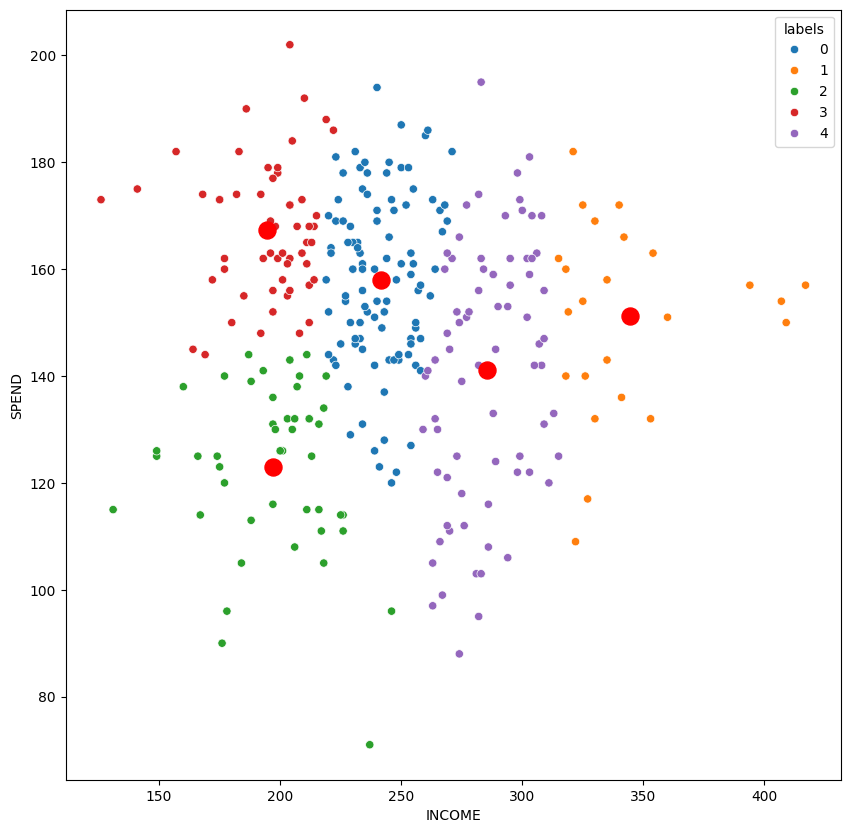

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x=df["INCOME"],y=df["SPEND"],hue="labels",palette="tab10")
plt.scatter(cen2df["x"],cen2df["y"],c="red",s=150)
plt.show()